# Part 1 - RGB Images

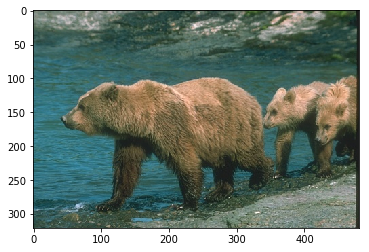

(321, 481, 3)

In [64]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import scipy.io as sio
import os

# Path of images
path = 'C:/Users/DarkB/Downloads/ML Python Scripts/Project 1/ImsAndSegs'

# Load image data
img_load = sio.loadmat('C:/Users/DarkB/Downloads/ML Python Scripts/Project 1/ImsAndSegs/ImsAndTruths100075.mat')
img = img_load['Im']
seg_im = img_load['Seg1']

# Plot image
plt.imshow(img)
plt.show()
img.shape

## K-Means Algorithm Implementation

KMeans clustering time to do: 0.05s


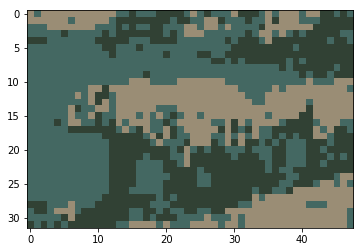

In [78]:
import time
import numpy as np
from sklearn.cluster import KMeans
from skimage.transform import rescale

#Downsample image
img_r = rescale(img,0.1,mode='reflect')
img_flat = img_r.reshape(img_r.shape[0] * img_r.shape[1], 3)
n_clusters = 3 

t0 = time.time()
# Initializing KMeans
kmeans = KMeans(n_clusters = n_clusters)

# Fitting with inputs
kmeans = kmeans.fit(img_flat)
clusters = kmeans.cluster_centers_[kmeans.predict(img_flat)]
t1 = time.time()

# Reshape flattened image
img_clustered = clusters.reshape(img_r.shape)

# Plot image
plt.imshow(img_clustered)
title = 'KMeans clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.show()

#### Color segmentation into different images

In [68]:
first_color = np.copy(clusters)
second_color = np.copy(clusters)
third_color = np.copy(clusters)


#Check for color channels and extract only unique RGB color for segmentation. ONLY WORK FOR N_CLUSTER = 3
t0 = time.time()
for colors in range(first_color.shape[0]):
    if np.array_equal(first_color[colors],[np.unique(img_clustered)[3], np.unique(img_clustered)[5], np.unique(img_clustered)[4]]):
          first_color[colors] = [0,0,255]
    else:
        first_color[colors] = [0,0,0]

for colors in range(second_color.shape[0]):
    if np.array_equal(second_color[colors],[np.unique(img_clustered)[8], np.unique(img_clustered)[7], np.unique(img_clustered)[6]]):
          second_color[colors] = [0,255,0]
    else:
        second_color[colors] = [0,0,0]
        
for colors in range(third_color.shape[0]):
    if np.array_equal(third_color[colors],[np.unique(img_clustered)[0], np.unique(img_clustered)[2], np.unique(img_clustered)[1]]):
          third_color[colors] = [255,0,0]
    else:
        third_color[colors] = [0,0,0]
t1 = time.time()
title = 'Segmentate 3 colors time to do: %.2fs' % (t1 - t0)
print(title)

# This is the distribution of the RGB color for this particular case
# [np.unique(r_recolored)[3], np.unique(r_recolored)[5], np.unique(r_recolored)[4]] -  Color #1
# [np.unique(r_recolored)[8], np.unique(r_recolored)[7], np.unique(r_recolored)[6]] - Color #2
# [np.unique(r_recolored)[0], np.unique(r_recolored)[2], np.unique(r_recolored)[1]] - Color #3
# Hopefully this ordering is consistent and how to scale for more color? -- Inacceptable time to run so many pictures

Segmentate 3 colors time to do: 48.33s


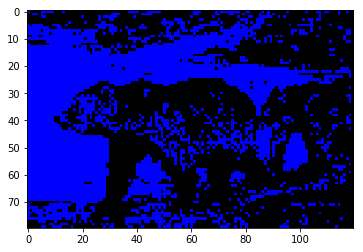

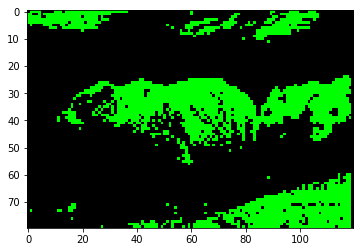

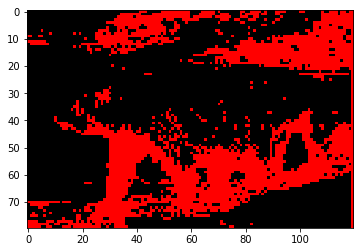

In [71]:
# Reshapes image segmentations
img_seg_1 = (first_color.reshape(img_r.shape)).astype(int)
img_seg_2 = (second_color.reshape(img_r.shape)).astype(int)
img_seg_3 = (third_color.reshape(img_r.shape)).astype(int)

# Plots segmented images
plt.figure(1)
plt.imshow(img_seg_1)
plt.figure(2)
plt.imshow(img_seg_2)
plt.figure(3)
plt.imshow(img_seg_3)
plt.show()

#This need cleaning with a filter to have less connected components

#### Image Cleaning using a Gaussian Filtering

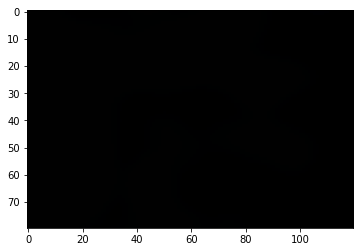

In [20]:
from skimage import measure
from skimage import filters

n = 12
l = 256
im = filters.gaussian(f_recolored_1, sigma= l / (4. * n),multichannel=False)
blobs = im > 0.7 * im.mean()

all_labels = measure.label(blobs)
blobs_labels = measure.label(blobs, background=0)

plt.imshow(blobs_labels )
plt.show()

# THIS STILL NEED WORK!!!
# Source:
# http://cs-tklab.na-inet.jp/~tkouya/python/scipy-lectures/packages/scikit-image/index.html#labeling-connected-components-of-a-discrete-image

#### If I include my data from the coordinates of my pixels

[[ 0.   0. ]
 [ 0.   0.1]
 [ 0.   0.2]
 ...
 [32.  47.8]
 [32.  47.9]
 [32.  48. ]]
KMeans clustering time to do: 13.00s


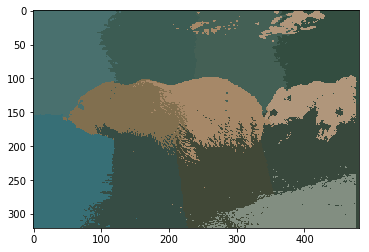

In [24]:
import time
from sklearn.cluster import KMeans
import numpy as np


coord_y = []
for ys in range(y.shape[0]):
    for xs in range(y.shape[1]):
        coord_y.append((ys,xs))
print((np.array(coord_y))*0.1)
data = y.reshape(y.shape[0] * y.shape[1], 3)
# print(new_data)
new_data = np.concatenate((data,np.array(coord_y)), axis=1)

# img_5d = np.reshape(new_data, (321, 481, 5))
# # img_5d[:,:,0:3]

# #From original data
# #Reshape to 2D - one column per rgb colour
# data = y.reshape(y.shape[0] * y.shape[1], 3)

# Initializing KMeans
kmeans = KMeans(n_clusters=12)

t0 = time.time()
# Fitting with inputs
kmeans = kmeans.fit(new_data)

#Finding lables for inputs
labels = kmeans.predict(new_data)

# Find corresponding center to data
new_colors = kmeans.cluster_centers_[kmeans.predict(new_data)]
t1 = time.time()

# Reshape data to 3D 
y_recolored = img_5d = np.reshape(new_colors, (321, 481, 5))
y_recolored = y_recolored.astype(np.uint8)

# #Plot data
title = 'KMeans clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.imshow(y_recolored[:,:,0:3])
plt.show()

#### The big issue here is the illumination, which is a big problem for machine learning

## Self-Organizing Map Algorithm Implementation

Self-Organizing Map clustering time to do: 0.03s


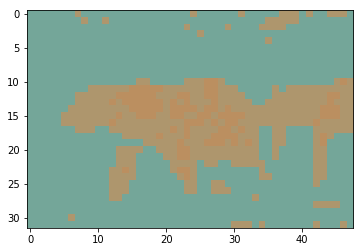

In [81]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt


# Reshaping the pixels matrix and rescaling
img_r = rescale(img,0.1,mode='reflect')
img_flat = np.reshape(img_r, (img_r.shape[0]*img_r.shape[1], 3))

n_clusters = 3

t0 = time.time()
#Uses MiniSOM algorithm to do SOM
som = MiniSom(1, n_clusters, 3, sigma=0.1, learning_rate=0.2)  # 3x1 = 3 final colors
som.random_weights_init(img_flat)
starting_weights = som.get_weights().copy()  # saving the starting weights
som.train_random(img_flat, 100)

qnt = som.quantization(img_flat)  # quantize each pixels of the image
clustered = np.zeros(img_r.shape)
for i, q in enumerate(qnt):  # place the quantized values into a new image
    clustered[np.unravel_index(i, dims=(img_r.shape[0], img_r.shape[1]))] = q
t1 = time.time()


plt.imshow(clustered)
title = 'Self-Organizing Map clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.show()

## Fuzzy C-Means Algorithm Implementation

Fuzzy C-Means clustering time to do: 0.02s


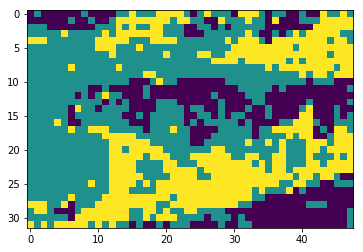

In [86]:
import skfuzzy
from skimage.transform import rescale
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

#Turn into grayscale
img_gray = rgb2gray(img)

# Rescale and reshape data
img_r = rescale(img_gray,0.1,mode='reflect')
img_flat = img_r.reshape((1, -1))

n_clusters = 3

t0 = time.time()
# Run algorithm
fzz = skfuzzy.cluster.cmeans(img_flat, c = n_clusters, m = 2, error=0.005, maxiter=1000)
t1 = time.time()

#Find clustering from fuzzy segmentation
img_clustered = np.argmax(fzz[1], axis=0).astype(float)
img_clustered.shape = img_r.shape

# Plot Image
plt.imshow(img_clustered)
title = 'Fuzzy C-Means clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.show()

## Spectral Clustering Algorithm Implementation

#### This one is based on the example - works but we lose the color data

Spectral clustering time to do: 0.22s


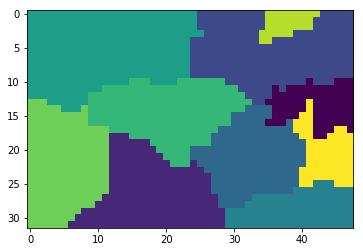

In [90]:
import time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

#Turn into grayscale
img_gray = rgb2gray(img)

# Resize it to 10% of the original size to speed up the processing
img_gray = rescale(img_gray,0.1,mode='reflect')

# Convert the image into a graph with the value of the gradient on the
# edges.
graph = image.img_to_graph(img_gray)

# Take a decreasing function of the gradient: an exponential
# The smaller beta is, the more independent the segmentation is of the
# actual image. For beta=1, the segmentation is close to a voronoi
beta = 5
eps = 1e-6
graph.data = np.exp(-beta * graph.data / graph.data.std()) + eps

# Apply spectral clustering (this step goes much faster if you have pyamg
# installed)
n_clusters = 10

t0 = time.time()
# Using discretized clustering
img_clustered = spectral_clustering(graph, n_clusters=n_clusters, assign_labels = 'discretize')
t1 = time.time()
img_clustered = img_clustered.reshape(img_gray.shape)

title = 'Spectral clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.imshow(img_clustered)
plt.show()

### Gaussian Mixture Models

Gaussian Mixture Model clustering time to do: 0.02s


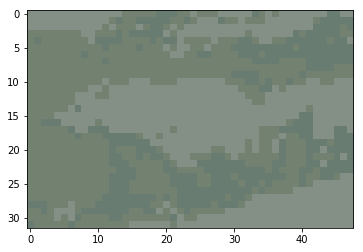

In [95]:
from sklearn import mixture

# Reshaping the image matrix
img_r = rescale(img,0.1,mode='reflect')
img_flat = np.reshape(img_r, (img_r.shape[0]*img_r.shape[1], 3))

n_clusters = 3

# Define model parameters
gmm = mixture.GaussianMixture(n_components=n_clusters, covariance_type='full')

t0 = time.time()
#Run algorithm
img_gmm = gmm.fit(img_flat)
img_clustered = img_flat[gmm.predict(img_flat)].astype(float)
t1 = time.time()

img_clustered.shape = img_r.shape

plt.imshow(img_clustered)
title = 'Gaussian Mixture Model clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.show()

# Part 2 - Hyperspectral Images

## Pavia Image

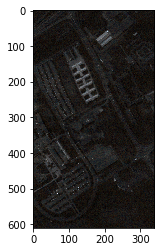

(610, 340, 3)

In [96]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import scipy.io as sio
import os



hsimg_load = sio.loadmat('PaviaHyperIm.mat')
hsimg_data = hsimg_load['PaviaHyperIm']
himage_display = hsimg_data[:,:,0:3]
plt.imshow(himage_display)
plt.show()
hsimg_data[:,:,0:3].shape

#### Number of component selection for PCA

We need about 3 components to retain 95% of the variance


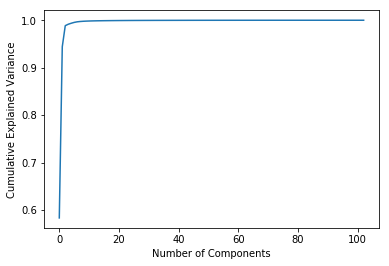

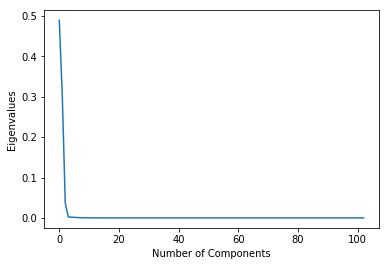

In [39]:
from sklearn.decomposition import PCA
data = hsimg_data.reshape(hsimg_data.shape[0] * hsimg_data.shape[1], hsimg_data.shape[2])
pca = PCA().fit(data)
cum_var = np.cumsum(pca.explained_variance_ratio_)
eigenvalues = pca.explained_variance_

count = 0
for var in cum_var:
    count += 1
    if var >= 0.95:
        n_components = count
        answer = "We need about "+ str(n_components) + " components to retain 95% of the variance"
        print(answer)
        break
        
plt.figure(1)
plt.plot(cum_var)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.figure(2)
plt.plot(eigenvalues)
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalues')
plt.show()

# Minumum Noise Factor --> Similar to PCA but removes noise from bands

#### Do PCA

In [110]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from skimage.transform import rescale
from sklearn.cluster import KMeans
import numpy as np
import time

#Reshape to 2D - one column per component
data = hsimg_data.reshape(hsimg_data.shape[0] * hsimg_data.shape[1], hsimg_data.shape[2])

#Using PCA
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(data)

#Since my data is not between [0,1], I rescale the data
min_max_scaler = MinMaxScaler()
reduced_data_scaled = min_max_scaler.fit_transform(reduced_data)

#Turn data back into 3 dimensions to control the downsampling of the data
reduced_data_3D = reduced_data_scaled .reshape(hsimg_data[:,:,0:3].shape)
img_r = rescale(reduced_data_3D,0.1,mode='reflect')

#Flatten my data agan for algorithm input
img_data = img_r.reshape(img_r.shape[0] * img_r.shape[1], 3)

### KMeans Algorithm

KMeans clustering time to do: 0.14s


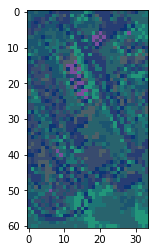

In [111]:
from sklearn.cluster import KMeans

n_clusters = 9

# Initializing KMeans
kmeans = KMeans(n_clusters=n_clusters)
# Fitting with inputs
t0 = time.time()

# Run algorithm
kmeans = kmeans.fit(img_data)
clusters = kmeans.cluster_centers_[kmeans.predict(img_data)]
t1 = time.time()

# Reshape the data into 3D
img_clustered = clusters.reshape(img_r.shape)

# Plot the data
plt.imshow(img_clustered)
title = 'KMeans clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.show()

### SOM Algorithm

Self-Organizing Map clustering time to do: 0.07s


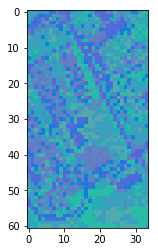

In [114]:
from minisom import MiniSom

n_clusters = 9

t0 = time.time()
#Run Algorithm
som = MiniSom(1, n_clusters, 3, sigma=0.1, learning_rate=0.2)  # 3x1 = 3 final colors
som.random_weights_init(img_data)
starting_weights = som.get_weights().copy()  # saving the starting weights
som.train_random(img_data, 100)

qnt = som.quantization(img_data)  # quantize each pixels of the image
clustered = np.zeros(img_r.shape)
for i, q in enumerate(qnt):  # place the quantized values into a new image
    clustered[np.unravel_index(i, dims=(img_r.shape[0], img_r.shape[1]))] = q
t1 = time.time()

# Plot image
plt.imshow(clustered)
title = 'Self-Organizing Map clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.show()

### Fuzzy C-Means

Fuzzy C-Means clustering time to do: 0.14s


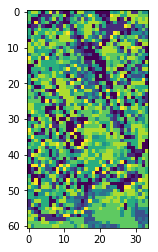

In [124]:
import skfuzzy
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

#Turn into grayscale
img_gray = rgb2gray(img_r)

# Reshape data
img_flat = img_gray.reshape((1, -1))

n_clusters = 9

t0 = time.time()
# Run algorithm
fzz = skfuzzy.cluster.cmeans(img_flat, c = n_clusters, m = 2, error=0.005, maxiter=1000)
t1 = time.time()

#Find clustering from fuzzy segmentation
img_clustered = np.argmax(fzz[1], axis=0).astype(float)
img_clustered.shape = img_gray.shape

plt.imshow(img_clustered)
title = 'Fuzzy C-Means clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.show()

### Spectral Clustering Algorithm

Spectral clustering time to do: 0.28s


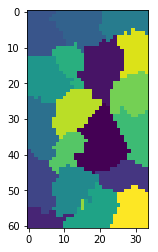

In [128]:
import time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])


#Turn into grayscale
img_gray = rgb2gray(img_r)

graph = image.img_to_graph(img_gray)#, mask=mask)

beta = 5
eps = 1e-6
graph.data = np.exp(-beta * graph.data / graph.data.std()) + eps

n_clusters = 20

t0 = time.time()
img_clustered = spectral_clustering(graph, n_clusters=n_clusters, assign_labels = 'discretize')
t1 = time.time()
img_clustered = img_clustered.reshape(img_gray.shape)


title = 'Spectral clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.imshow(img_clustered)
plt.show()

### Gaussian Mixture Model Algorithm

Gaussian Mixture Model clustering time to do: 0.12s


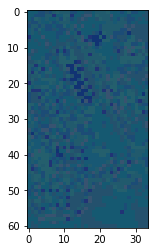

In [132]:
from sklearn import mixture

n_clusters = 9

gmm = mixture.GaussianMixture(n_components=n_clusters, covariance_type='full')

t0 = time.time()
# Run the algorithm
img_gmm = gmm.fit(img_data)
img_clustered = img_data[gmm.predict(img_data)].astype(float)
t1 = time.time()

# Reshape the data
img_clustered.shape = img_r.shape

# Plot the data
plt.imshow(img_clustered)
title = 'Gaussian Mixture Model clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.show()

### Everthing below this is not cleaned!!!!!

## Santa Barbara Image

In [51]:
import scipy.io as sio
import os

hsimg_load = sio.loadmat('SanBarHyperIm.mat')
hsimg_data = hsimg_load['SanBarIm88x400']
himage_display = hsimg_data[:,:,0:3]
hsimg_data#[:,:,0:3].shape

array([[[0.0187, 0.0194, 0.025 , ..., 0.0999, 0.095 , 0.0929],
        [0.0099, 0.0096, 0.0184, ..., 0.0812, 0.0782, 0.0783],
        [0.024 , 0.0258, 0.0342, ..., 0.1151, 0.1075, 0.107 ],
        ...,
        [0.0023, 0.0024, 0.0023, ..., 0.0412, 0.037 , 0.0362],
        [0.0023, 0.0024, 0.0023, ..., 0.0349, 0.0335, 0.0297],
        [0.0023, 0.0024, 0.0023, ..., 0.0285, 0.0301, 0.0277]],

       [[0.0493, 0.0631, 0.08  , ..., 0.1405, 0.1356, 0.1344],
        [0.0434, 0.0567, 0.0683, ..., 0.1213, 0.1223, 0.1205],
        [0.0324, 0.0503, 0.0639, ..., 0.128 , 0.1314, 0.1239],
        ...,
        [0.0023, 0.0024, 0.0062, ..., 0.0359, 0.0333, 0.0306],
        [0.0023, 0.0024, 0.0029, ..., 0.0468, 0.0446, 0.0433],
        [0.0023, 0.0024, 0.0023, ..., 0.0257, 0.0253, 0.0242]],

       [[0.0311, 0.0482, 0.0629, ..., 0.1654, 0.1621, 0.1603],
        [0.0335, 0.0521, 0.0633, ..., 0.1663, 0.1673, 0.1657],
        [0.0058, 0.0237, 0.0392, ..., 0.1039, 0.103 , 0.1049],
        ...,
        [0.0

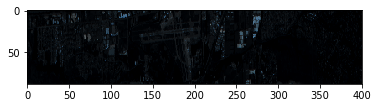

In [52]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

plt.imshow(himage_display)
plt.show()

We need about 3 components to retain 95% of the variance


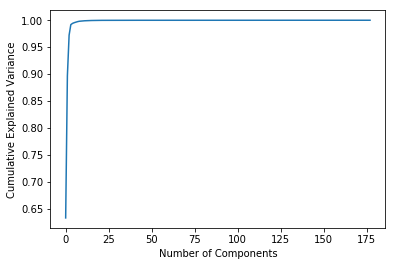

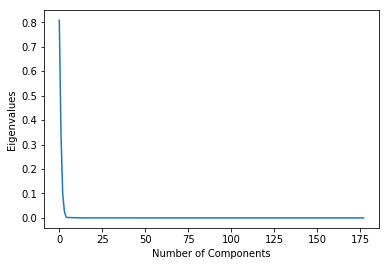

In [53]:
from sklearn.decomposition import PCA
data = hsimg_data.reshape(hsimg_data.shape[0] * hsimg_data.shape[1], hsimg_data.shape[2])
pca = PCA().fit(data)
cum_var = np.cumsum(pca.explained_variance_ratio_)
eigenvalues = pca.explained_variance_

count = 0
for var in cum_var:
    count += 1
    if var >= 0.95:
        n_components = count
        answer = "We need about "+ str(n_components) + " components to retain 95% of the variance"
        print(answer)
        break
        
plt.figure(1)
plt.plot(cum_var)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.figure(2)
plt.plot(eigenvalues)
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalues')
plt.show()
# Minumum Noise Factor --> Similar to PCA but removes noise from bands

KMeans clustering time to do: 2.44s


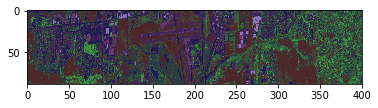

In [54]:
#Reshape to 2D - one column per rgb colour
data = hsimg_data.reshape(hsimg_data.shape[0] * hsimg_data.shape[1], hsimg_data.shape[2])

#Using PCA
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(data)
min_max_scaler = MinMaxScaler()
reduced_data_scaled = min_max_scaler.fit_transform(reduced_data)

# Initializing KMeans
kmeans = KMeans(n_clusters=9)
# Fitting with inputs
t0 = time.time()
kmeans = kmeans.fit(reduced_data_scaled)

new_colors = kmeans.cluster_centers_[kmeans.predict(reduced_data_scaled)]

t1 = time.time()
r_recolored = new_colors.reshape(hsimg_data[:,:,0:3].shape)
plt.imshow(r_recolored)
title = 'KMeans clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.show()

Self-Organizing Map clustering time to do: 0.74s


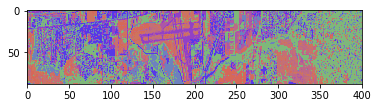

In [55]:
from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt


#Reshape to 2D - one column per rgb colour
data = hsimg_data.reshape(hsimg_data.shape[0] * hsimg_data.shape[1], hsimg_data.shape[2])

#Using PCA
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(data)


min_max_scaler = MinMaxScaler()
reduced_data_scaled = min_max_scaler.fit_transform(reduced_data)


r_data = reduced_data_scaled.reshape(hsimg_data[:,:,0:3].shape)
r = rescale(r_data,1,mode='reflect')
reduced_data = r.reshape(r.shape[0] * r.shape[1], 3)
pixels = reduced_data
# # reshaping the pixels matrix
# r = rescale(y,0.2,mode='reflect')
# pixels = np.reshape(r, (r.shape[0]*r.shape[1], 3))

n_clusters = 9

t0 = time.time()
som = MiniSom(1, n_clusters, 3, sigma=0.1, learning_rate=0.2)  # 3x1 = 3 final colors
som.random_weights_init(reduced_data)
starting_weights = som.get_weights().copy()  # saving the starting weights
som.train_random(pixels, 100)

qnt = som.quantization(pixels)  # quantize each pixels of the image
clustered = np.zeros(r.shape)
for i, q in enumerate(qnt):  # place the quantized values into a new image
    clustered[np.unravel_index(i, dims=(r.shape[0], r.shape[1]))] = q
t1 = time.time()

# plt.figure(1)
# plt.subplot(221)
plt.imshow(clustered)
title = 'Self-Organizing Map clustering time to do: %.2fs' % (t1 - t0)
print(title)
# plt.subplot(223)
# plt.title('learned colors')
# plt.imshow(som.get_weights(), interpolation='none')
plt.show()

Fuzzy C-Means clustering time to do: 0.84s


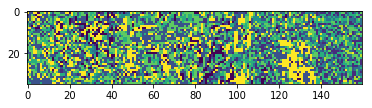

In [56]:
import skfuzzy
from skimage.transform import rescale

#Reshape to 2D - one column per rgb colour
data = hsimg_data.reshape(hsimg_data.shape[0] * hsimg_data.shape[1], hsimg_data.shape[2])

#Using PCA
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(data)


min_max_scaler = MinMaxScaler()
reduced_data_scaled = min_max_scaler.fit_transform(reduced_data)


r_data = reduced_data_scaled.reshape(hsimg_data[:,:,0:3].shape)
r = rescale(r_data,1,mode='reflect')

#Using Downsample
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

#Turn into grayscale
bears_gray = rgb2gray(r)

# Rescale and reshape data
r = rescale(bears_gray,0.4,mode='reflect')
I = r.reshape((1, -1))

n_clusters = 9
t0 = time.time()
# Run algorithm
fzz = skfuzzy.cluster.cmeans(I, c = n_clusters, m = 2, error=0.005, maxiter=1000)
t1 = time.time()
#Find clustering from fuzzy segmentation
img_clustered = np.argmax(fzz[1], axis=0).astype(float)
img_clustered.shape = r.shape

plt.imshow(img_clustered)
title = 'Fuzzy C-Means clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.show()

Spectral clustering time to do: 3.66s


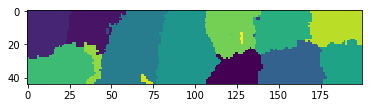

In [57]:
import time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

import skfuzzy
from skimage.transform import rescale

#Reshape to 2D - one column per rgb colour
data = hsimg_data.reshape(hsimg_data.shape[0] * hsimg_data.shape[1], hsimg_data.shape[2])

#Using PCA
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(data)


min_max_scaler = MinMaxScaler()
reduced_data_scaled = min_max_scaler.fit_transform(reduced_data)


r_data = reduced_data_scaled.reshape(hsimg_data[:,:,0:3].shape)
r = rescale(r_data,0.5,mode='reflect')

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

#Turn into grayscale
bears_gray = rgb2gray(r)

# bears_gray = rescale(bears_gray,0.1,mode='reflect')

graph = image.img_to_graph(bears_gray)#, mask=mask)

beta = 5
eps = 1e-6
graph.data = np.exp(-beta * graph.data / graph.data.std()) + eps

n_clusters = 20

t0 = time.time()
labels = spectral_clustering(graph, n_clusters=n_clusters, assign_labels = 'discretize')
t1 = time.time()
labels = labels.reshape(bears_gray.shape)


title = 'Spectral clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.imshow(labels)
plt.show()

Gaussian Mixture Model clustering time to do: 1.58s


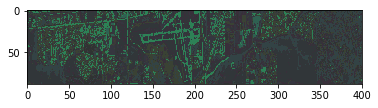

In [58]:
from sklearn import mixture

#Reshape to 2D - one column per rgb colour
data = hsimg_data.reshape(hsimg_data.shape[0] * hsimg_data.shape[1], hsimg_data.shape[2])

#Using PCA
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(data)

min_max_scaler = MinMaxScaler()
reduced_data_scaled = min_max_scaler.fit_transform(reduced_data)


r_data = reduced_data_scaled.reshape(hsimg_data[:,:,0:3].shape)

# reshaping the pixels matrix
r = rescale(r_data,1,mode='reflect')
img = np.reshape(r, (r.shape[0]*r.shape[1], 3))

n_clusters = 9

gmm = mixture.GaussianMixture(n_components=n_clusters, covariance_type='full')
t0 = time.time()
img_gmm = gmm.fit(img)
img_labels = img[gmm.predict(img)].astype(float)
t1 = time.time()
img_labels.shape = r.shape

plt.imshow(img_labels)
title = 'Gaussian Mixture Model clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.show()

In [59]:
import scipy.io as sio
import os

hsimg_load = sio.loadmat('SanBarWavelengths.mat')
hsimg_data = hsimg_load['WaveLengths']
hsimg_data

# himage_display = hsimg_data[:,:,0:3]
# hsimg_data[:,:,0:3].shape

array([[0.3949, 0.4046, 0.4143, 0.424 , 0.4337, 0.4434, 0.4531, 0.4628,
        0.4725, 0.4822, 0.4919, 0.5016, 0.5114, 0.5211, 0.5308, 0.5406,
        0.5503, 0.56  , 0.5698, 0.5796, 0.5893, 0.5991, 0.6089, 0.6186,
        0.6284, 0.6382, 0.648 , 0.6578, 0.6676, 0.6558, 0.6656, 0.6754,
        0.6852, 0.695 , 0.7048, 0.7146, 0.7243, 0.7341, 0.7439, 0.7536,
        0.7634, 0.7731, 0.7829, 0.7926, 0.8024, 0.8121, 0.8218, 0.8315,
        0.8412, 0.8509, 0.8606, 0.8703, 0.88  , 0.8897, 0.8994, 0.9091,
        0.9188, 0.9381, 0.9477, 0.9574, 0.967 , 0.9767, 0.9863, 0.9959,
        1.0056, 1.0152, 1.0248, 1.0344, 1.044 , 1.0536, 1.0632, 1.0728,
        1.0824, 1.092 , 1.1015, 1.1111, 1.1302, 1.1398, 1.1493, 1.1589,
        1.1684, 1.1779, 1.1874, 1.197 , 1.2065, 1.216 , 1.2255, 1.235 ,
        1.2445, 1.254 , 1.2635, 1.2534, 1.2633, 1.2733, 1.2833, 1.2933,
        1.3032, 1.3132, 1.4428, 1.4528, 1.4627, 1.4727, 1.4827, 1.4927,
        1.5026, 1.5126, 1.5226, 1.5325, 1.5425, 1.5524, 1.5624, 